# Historical trends in scientific publishing

The ArXiv provides the complete metadata on kaggle for all publications it hosts that is updated weekly. In this notebook we'll be looking for publications in the condensed matter (cond-mat) category. Let's load the dataset:

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)

import regex

cond_mat = pd.read_csv('cond_mat.csv', low_memory=False)
cond_mat

,categories,id,authors,title,abstract,versions
0,cond-mat.mes-hall,0704.0006,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200..."
1,cond-mat.mtrl-sci,0704.0008,Damian C. Swift,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200..."
2,cond-mat.str-el cond-mat.stat-mech,0704.0025,A. S. Mishchenko (1 and 2) and N. Nagaosa (1 a...,Spectroscopic Properties of Polarons in Strong...,We present recent advances in understanding ...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007..."
3,cond-mat.mes-hall,0704.0027,"M. O. Goerbig, J.-N. Fuchs, K. Kechedzhi, Vlad...",Filling-Factor-Dependent Magnetophonon Resonan...,We describe a peculiar fine structure acquir...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007..."
4,cond-mat.str-el,0704.0030,J.P.Hague and N.d'Ambrumenil,Tuning correlation effects with electron-phono...,We investigate the effect of tuning the phon...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200..."
...,...,...,...,...,...,...
369013,supr-con cond-mat.supr-con,supr-con/9608008,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,We report on measurements of the angular dep...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 199..."
369014,supr-con cond-mat.supr-con,supr-con/9609001,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,The non-linear microwave surface impedance o...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 199..."
369015,supr-con cond-mat.supr-con,supr-con/9609002,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,The vortex contribution to the dc field (H) ...,"[{'version': 'v1', 'created': 'Tue, 3 Sep 1996..."
369016,supr-con cond-mat.supr-con,supr-con/9609003,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,We show that the density of states in an ani...,"[{'version': 'v1', 'created': 'Wed, 18 Sep 199..."


We will analyse the data by time, grouping together articles that were published in the same time period, with different levels of fine-graining -- weeks, months and semesters (half-years). We can add additional columns to the dataframe corresponding to the amount of time elapsed since the publication of the earliest article in cond-mat in March 1992.

In [ ]:
from datetime import datetime
import ast

format_date = "%a, %d %b %Y %H:%M:%S %Z"
March_1992 = datetime(1992, 3, 1)

def get_created_date(versions):
    versions = ast.literal_eval(versions)
    created_date = datetime.strptime(versions[0]['created'], format_date)
    return created_date

def count_semesters(versions):
    created_date = get_created_date(versions)
    return (created_date.year - 1992)*2 + created_date.month//6

def count_months(versions):
    created_date = get_created_date(versions)
    return (created_date.year - 1992)*12 + created_date.month-3

def count_weeks(versions):
    created_date = get_created_date(versions)
    return (created_date-March_1992).days//7

cond_mat['semesters_since_March_1992'] = cond_mat['versions'].apply(count_semesters)
cond_mat['weeks_since_March_1992'] = cond_mat['versions'].apply(count_weeks)
cond_mat['months_since_March_1992'] = cond_mat['versions'].apply(count_months)
cond_mat

,categories,id,authors,title,abstract,versions,semesters_since_March_1992,weeks_since_March_1992,months_since_March_1992
0,cond-mat.mes-hall,0704.0006,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",30,786,180
1,cond-mat.mtrl-sci,0704.0008,Damian C. Swift,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",30,786,180
2,cond-mat.str-el cond-mat.stat-mech,0704.0025,A. S. Mishchenko (1 and 2) and N. Nagaosa (1 a...,Spectroscopic Properties of Polarons in Strong...,We present recent advances in understanding ...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",30,787,181
3,cond-mat.mes-hall,0704.0027,"M. O. Goerbig, J.-N. Fuchs, K. Kechedzhi, Vlad...",Filling-Factor-Dependent Magnetophonon Resonan...,We describe a peculiar fine structure acquir...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",30,787,181
4,cond-mat.str-el,0704.0030,J.P.Hague and N.d'Ambrumenil,Tuning correlation effects with electron-phono...,We investigate the effect of tuning the phon...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",30,786,180
...,...,...,...,...,...,...,...,...,...
369013,supr-con cond-mat.supr-con,supr-con/9608008,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,We report on measurements of the angular dep...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 199...",9,234,53
369014,supr-con cond-mat.supr-con,supr-con/9609001,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,The non-linear microwave surface impedance o...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 199...",9,234,53
369015,supr-con cond-mat.supr-con,supr-con/9609002,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,The vortex contribution to the dc field (H) ...,"[{'version': 'v1', 'created': 'Tue, 3 Sep 1996...",9,235,54
369016,supr-con cond-mat.supr-con,supr-con/9609003,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,We show that the density of states in an ani...,"[{'version': 'v1', 'created': 'Wed, 18 Sep 199...",9,237,54


We can check if any weeks or months are missing:

In [ ]:
display(min(cond_mat['weeks_since_March_1992']))
display(max(cond_mat['weeks_since_March_1992']))

3

1676

In [ ]:
display([week for week in range(3,1677) if week not in cond_mat['weeks_since_March_1992'].unique()])

[4]

In [ ]:
display(min(cond_mat['months_since_March_1992']))
display(max(cond_mat['months_since_March_1992']))

0

385

In [ ]:
display([month for month in range(386) if month not in cond_mat['months_since_March_1992'].unique()])

[]

There was one week in March 1992 where no published papers appeared in the cond-mat.

Let's look at the monthly publication numbers:

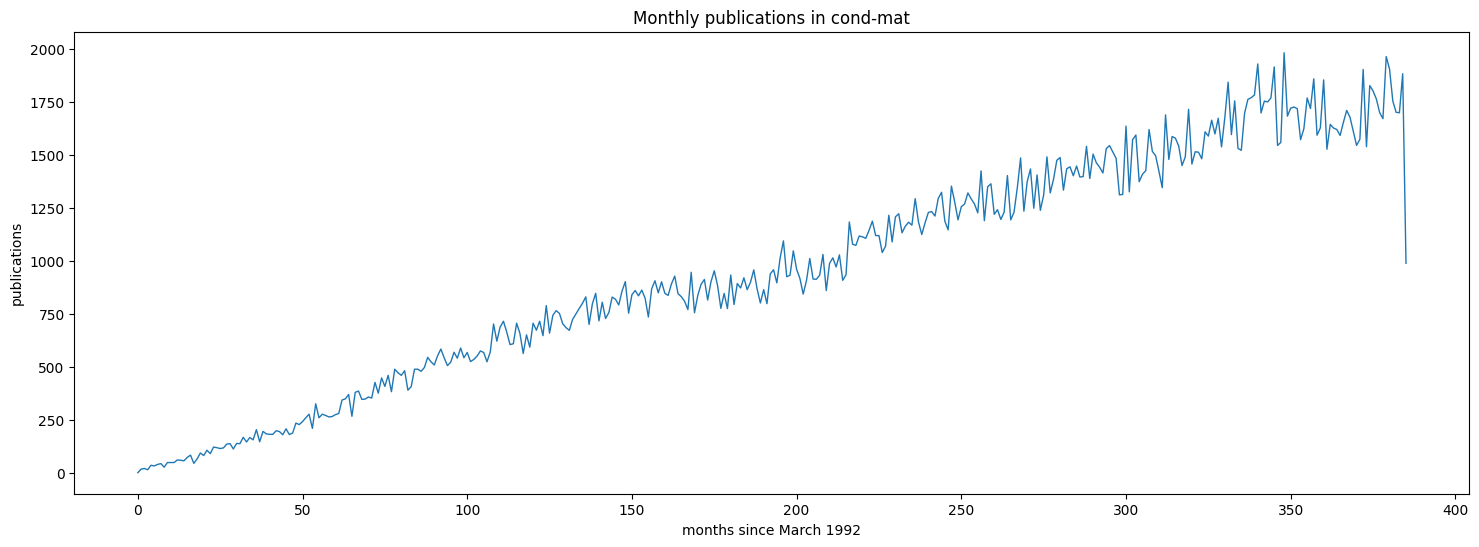

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_publications = [len(cond_mat[cond_mat['months_since_March_1992']==month]) for month in range(0,386)]

fig,ax = plt.subplots(1,1, figsize=(18, 6))
ax.set_title('Monthly publications in cond-mat')
ax.set_xlabel('months since March 1992')
ax.set_ylabel('publications')

_ = sns.lineplot(x=range(len(monthly_publications)), y=monthly_publications, ax=ax, linewidth=1)


The data for the last month is incomplete, so we can drop it from the dataframe. We see a roughly linear growth in the number of publications since the first cond-mat publication.

In [ ]:
cond_mat.drop(cond_mat[cond_mat['months_since_March_1992']==385].index, inplace=True)

In [ ]:
from scipy.stats import linregress
m, b, r_value, p_value, std = linregress(range(385), monthly_publications[:385])
print(f"Growth rate: +{m:.4f} papers per month")

Growth rate: +4.7197 papers per month


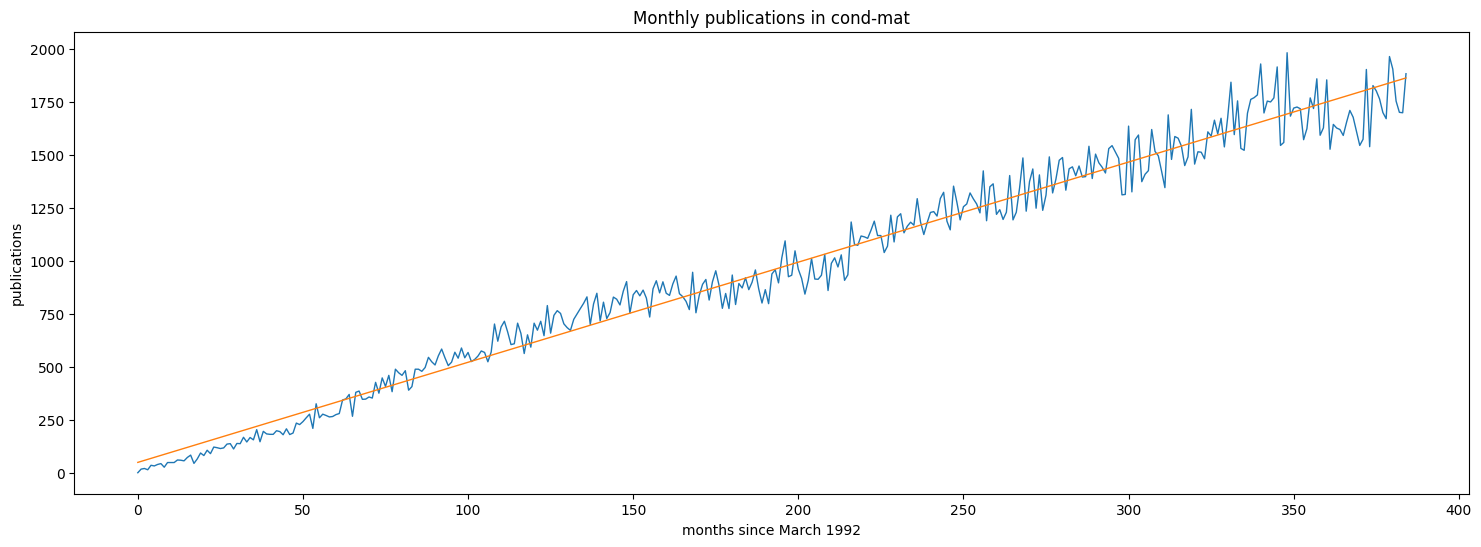

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(18, 6))
ax.set_title('Monthly publications in cond-mat')
ax.set_xlabel('months since March 1992')
ax.set_ylabel('publications')

_ = sns.lineplot(x=range(385), y=monthly_publications[:385], ax=ax, linewidth=1)
_ = sns.lineplot(x=range(385), y=[m*x+b for x in range(385)], ax=ax, linewidth=1)


Next, let's look at the weekly publication numbers:

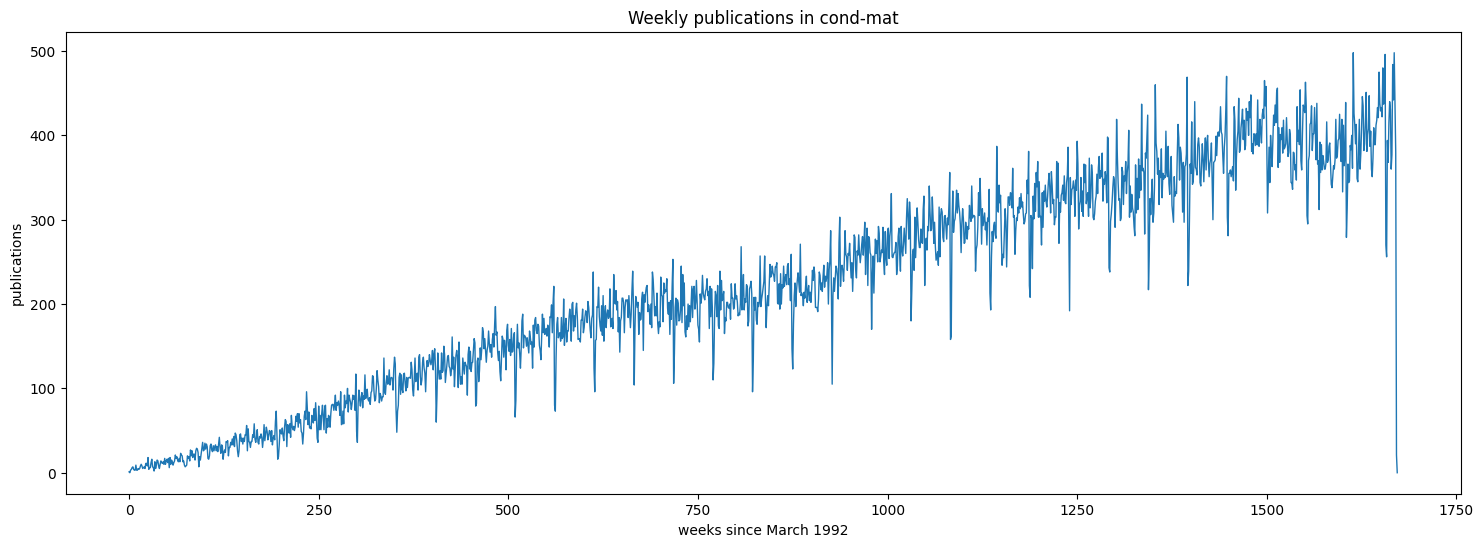

In [ ]:
weekly_publications = [len(cond_mat[cond_mat['weeks_since_March_1992']==week]) for week in range(3,1676)]

fig,ax = plt.subplots(1,1, figsize=(18, 6))
ax.set_title('Weekly publications in cond-mat')
ax.set_xlabel('weeks since March 1992')
ax.set_ylabel('publications')

_ = sns.lineplot(x=range(len(weekly_publications)), y=weekly_publications, ax=ax, linewidth=1)

If the arxiv database is accurate, it seems like there is a regular pattern of sharp dips and spikes in the number of publications over time, which is quite an interesting phenomenon. However, for the purpose of analysing trends, we will be using the monthly data as it is much smoother.

## Natural language processing

### Generating the vocabulary

We will now create a vocabulary of keywords from the titles and abstracts. I'll use NER (Named Entity Recognition) from the transformers library to identify special words:

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/distilbert-NER")
model = TFAutoModelForTokenClassification.from_pretrained("dslim/distilbert-NER")

ner = pipeline("ner", model=model, tokenizer=tokenizer)

/home/tommy/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-16 01:01:47.232641: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 01:01:47.350769: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 01:01:47.733558: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 01:01:49.168498: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
All PyTorch model weights we

Note that NER is case sensitive:

In [ ]:
ner('peter')

[{'entity': 'LABEL_0',
  'score': 0.9549229,
  'index': 1,
  'word': 'pet',
  'start': 0,
  'end': 3},
 {'entity': 'LABEL_0',
  'score': 0.98883796,
  'index': 2,
  'word': '##er',
  'start': 3,
  'end': 5}]

In [ ]:
ner('Peter')

[{'entity': 'LABEL_1',
  'score': 0.98770624,
  'index': 1,
  'word': 'Peter',
  'start': 0,
  'end': 5}]

Next, we'll tokenise the titles and abstracts, removing punctuation and numbers.

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="Processing rows")

In [ ]:
import regex
import string

def tokenize(text):
    pattern = r'[\s{}]+'.format(regex.escape(string.punctuation))
    tokens = regex.split(pattern, text)
    return [token for token in tokens if token and not token.isdigit()]

cond_mat['title_tokenized'] = cond_mat['title'].progress_apply(tokenize)
cond_mat['abstract_tokenized'] = cond_mat['abstract'].progress_apply(tokenize)

Processing rows: 100%|███████████████| 368030/368030 [00:26<00:00, 13951.93it/s]


In [ ]:
tokenize('This! is! a! test! Potato!')

['This', 'is', 'a', 'test', 'Potato']

Next, we'll generate a vocabulary using scikit-learn's TfidfVectorizer. This is a powerful tool that performs a count of each token in a text sample, as well as a count of the token in the entire corpus.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
%%time

from scipy.sparse import csr_matrix

count_vectorizer = CountVectorizer(preprocessor= lambda x:x, tokenizer=lambda x:x, binary=True, token_pattern=None, lowercase=False)
vectorizer_train = pd.concat([cond_mat['abstract_tokenized'], cond_mat['title_tokenized']])
vectorized = count_vectorizer.fit_transform(vectorizer_train)
document_frequencies =  np.ravel(vectorized.sum(axis=0))

vocabulary = count_vectorizer.get_feature_names_out()
vocab_size = len(vocabulary)

print("Created count vectorizer with vocabulary size = ", vocab_size)

Created count vectorizer with vocabulary size =  191152
CPU times: user 10.6 s, sys: 670 ms, total: 11.3 s
Wall time: 11.3 s


The vocabulary will contain variations of the same word, e.g. "quantize" and "quantization", "magnetic," "magnetism", "magnetize", "magnetization," etc. In order to identify the keywords, we will have to first merge these variations. I'll do this by introducing a function that removes suffixes from words and then matches their stems.

In [ ]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

def word_similarity(v, w):
    if v == w:
        return True
    v = stemmer.stem(v)
    w = stemmer.stem(w)
    L = min(len(v),len(w))
    if L < 5:
        return False
    return v[:L] == w[:L]

In [ ]:
word_similarity('superconducting', 'superconductor')

True

In [ ]:
word_similarity('quantized', 'quantization')

True

In [ ]:
word_similarity('magnetism', 'magnetization')

True

In [ ]:
word_similarity('learning', 'leading')

False

We'll create a "base vocabulary" consisting of words which have had their variations merged:

In [ ]:
stop_words = ['the', 'of', 'and', 'in', 'a', 'to', 'we', 'with', 'is', 'that', 'for', 'by', 'this', 'on', 'are', 'as', 'an', 'which', 'from', 'be', 'at', 'can', 'our', 'where']

def create_base_vocabulary(vocabulary):
    base_vocabulary_unnamed = []
    vocabulary_named = []
    base_word_dict = {}

    for word in tqdm(vocabulary):
        if word.lower() in stop_words:
            continue

        if word in base_vocabulary_unnamed or word in vocabulary_named:
            continue

        items = ner(word)
        if items[0]['entity'] != 'LABEL_0':
            vocabulary_named.append(word)
            continue

        found_match = False
        word = word.lower()
        for base_word in base_vocabulary_unnamed:
            if word_similarity(word, base_word):
                base_word_dict[word] = base_word
                found_match = True
        if not found_match:
            base_vocabulary_unnamed.append(word)

    return base_vocabulary_unnamed, vocabulary_named, base_word_dict

Due to the large size of the vocabulary, creating a dictionary of variations of each word would take hours. We can simply select the most common words, which we can do by ranking the idf (inverse document frequency) scores from the TfidfVectorizer: the lower the idf score, the more common the word:

In [ ]:
%%time
word_indices_ranked_by_frequency = np.argsort(document_frequencies)
words_ranked_by_frequency = [vocabulary[word_indices_ranked_by_frequency[vocab_size - 1 - i]] for i in range(vocab_size)]

CPU times: user 109 ms, sys: 0 ns, total: 109 ms
Wall time: 108 ms


In [ ]:
print(words_ranked_by_frequency[:100])

['of', 'in', 'the', 'and', 'a', 'to', 'with', 'for', 'is', 'that', 'by', 'We', 'The', 'on', 'are', 'we', 'an', 'as', 'which', 'at', 'from', 'be', 'this', 'two', 'can', 'model', 'In', 'quantum', 'between', 'field', 'show', 'spin', 'results', 'phase', 'study', 'state', 'temperature', 'energy', 'magnetic', 'This', 'system', 'properties', 'also', 'dimensional', 'systems', 'one', 'states', 'using', 'transition', 'A', 'theory', 'or', 'have', 'non', 'density', 'order', 'these', 'time', 'high', 'has', 'based', 'structure', 'it', 'effect', 'different', 'such', 'both', 'dynamics', 'low', 'well', 'find', 'single', 'electron', 'Our', 'not', 'lattice', 'large', 'its', 'present', 'where', 'their', 'been', 'function', 'range', 'Here', 'coupling', 'into', 'interaction', 'first', 'observed', 'found', 'our', 'due', 'critical', 'experimental', 'effects', 'behavior', 'potential', 'method', 'than']


In [ ]:
base_vocabulary_unnamed, vocabulary_named, base_word_dict = create_base_vocabulary(words_ranked_by_frequency[:10000])

100%|█████████████████████████████████████| 10000/10000 [13:06<00:00, 12.72it/s]


In [ ]:
print(base_vocabulary_unnamed)

['two', 'model', 'quantum', 'between', 'field', 'show', 'spin', 'results', 'phase', 'study', 'state', 'temperature', 'energy', 'magnetic', 'system', 'properties', 'also', 'dimensional', 'one', 'using', 'transition', 'theory', 'or', 'have', 'non', 'density', 'order', 'these', 'time', 'high', 'has', 'based', 'structure', 'it', 'effect', 'different', 'such', 'both', 'dynamics', 'low', 'well', 'find', 'single', 'electron', 'not', 'lattice', 'large', 'its', 'present', 'their', 'been', 'function', 'range', 'here', 'coupling', 'into', 'interaction', 'first', 'observed', 'found', 'due', 'critical', 'experimental', 'behavior', 'potential', 'method', 'than', 'approach', 'surface', 'new', 'induced', 'but', 's', 'strong', 'when', 'transport', 'materials', 'used', 'demonstrate', 'through', 'only', 'point', 'finite', 'charge', 'simulations', 'other', 'symmetry', 'three', 'obtained', 'wave', 'work', 'number', 'calculations', 'local', 'case', 'all', 'analysis', 'band', 'under', 'dependence', 'small', 

We will now replace each token variation in the title and abstract with its base form.

In [ ]:
base_word_dict['superconductor']

'superconducting'

In [ ]:
def replace_words(text):
    new_text = []
    for word in text:
        if word.lower() in stop_words:
            continue
        if word.lower() in base_word_dict:
            new_text.append(base_word_dict[word.lower()])
        else:
            new_text.append(word.lower())
    return new_text

In [ ]:
cond_mat.loc[:,'title_base_replaced'] = cond_mat['title_tokenized'].progress_apply(replace_words)
cond_mat.loc[:,'abstract_base_replaced'] = cond_mat['abstract_tokenized'].progress_apply(replace_words)

Processing rows: 100%|███████████████| 368030/368030 [00:12<00:00, 30378.83it/s]


In [ ]:
cond_mat

,categories,id,authors,title,abstract,versions,semesters_since_March_1992,weeks_since_March_1992,months_since_March_1992,title_tokenized,abstract_tokenized,title_base_replaced,abstract_base_replaced
0,cond-mat.mes-hall,0704.0006,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",30,786,180,"[Bosonic, characters, of, atomic, Cooper, pair...","[We, study, the, two, particle, wave, function...","[bosonic, characterized, atomic, cooper, pairs...","[study, two, particle, wave, function, paired,..."
1,cond-mat.mtrl-sci,0704.0008,Damian C. Swift,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",30,786,180,"[Numerical, solution, of, shock, and, ramp, co...","[A, general, formulation, was, developed, to, ...","[numerical, solution, shock, ramp, compression...","[general, formula, was, developed, representat..."
2,cond-mat.str-el cond-mat.stat-mech,0704.0025,A. S. Mishchenko (1 and 2) and N. Nagaosa (1 a...,Spectroscopic Properties of Polarons in Strong...,We present recent advances in understanding ...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",30,787,181,"[Spectroscopic, Properties, of, Polarons, in, ...","[We, present, recent, advances, in, understand...","[spectroscopy, properties, polarization, stron...","[present, recent, advanced, under, ground, exc..."
3,cond-mat.mes-hall,0704.0027,"M. O. Goerbig, J.-N. Fuchs, K. Kechedzhi, Vlad...",Filling-Factor-Dependent Magnetophonon Resonan...,We describe a peculiar fine structure acquir...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",30,787,181,"[Filling, Factor, Dependent, Magnetophonon, Re...","[We, describe, a, peculiar, fine, structure, a...","[filling, factor, dependence, magnetophonon, r...","[described, peculiar, fine, structure, acquire..."
4,cond-mat.str-el,0704.0030,J.P.Hague and N.d'Ambrumenil,Tuning correlation effects with electron-phono...,We investigate the effect of tuning the phon...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",30,786,180,"[Tuning, correlation, effects, with, electron,...","[We, investigate, the, effect, of, tuning, the...","[tuning, correlation, effect, electron, phonon...","[investigate, effect, tuning, phonon, energy, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369013,supr-con cond-mat.supr-con,supr-con/9608008,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,We report on measurements of the angular dep...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 199...",9,234,53,"[On, the, origin, of, the, irreversibility, li...","[We, report, on, measurements, of, the, angula...","[origin, irreversible, line, thin, ybacuo7, fi...","[report, measurements, angular, dependence, ir..."
369014,supr-con cond-mat.supr-con,supr-con/9609001,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,The non-linear microwave surface impedance o...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 199...",9,234,53,"[Nonlinear, Response, of, HTSC, Thin, Film, Mi...","[The, non, linear, microwave, surface, impedan...","[nonlinear, response, htsc, thin, film, microw...","[non, linear, microwave, surface, impedance, p..."
369015,supr-con cond-mat.supr-con,supr-con/9609002,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,The vortex contribution to the dc field (H) ...,"[{'version': 'v1', 'created': 'Tue, 3 Sep 1996...",9,235,54,"[Critical, State, Flux, Penetration, and, Line...","[The, vortex, contribution, to, the, dc, field...","[critical, state, flux, penetration, linear, m...","[vortex, contribution, dc, field, h, dependenc..."
369016,supr-con cond-mat.supr-con,supr-con/9609003,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,We

We can now perform a count vectorisation of the modified text. In addition to individual tokens, we can include bigrams and trigrams to capture terms consisting of several words, e.g. "quantum computing" or "machine learning."

In [ ]:
%%time

count_vectorizer = CountVectorizer(preprocessor= lambda x:x, tokenizer=lambda x:x, ngram_range=(1,3), binary=True, token_pattern=None, lowercase=False)
vectorizer_train = pd.concat([cond_mat['abstract_base_replaced'], cond_mat['title_base_replaced']])
vectorized = count_vectorizer.fit_transform(vectorizer_train)
document_frequencies =  np.ravel(vectorized.sum(axis=0))

vocabulary = count_vectorizer.get_feature_names_out()
vocab_size = len(vocabulary)
print(f"Created new count vectorizer with vocabulary size = {vocab_size}")

Created new count vectorizer with vocabulary size = 28875927
CPU times: user 2min 58s, sys: 8.47 s, total: 3min 7s
Wall time: 3min 6s


The count vectorizer can give us the number of documents in which each term has appeared:

In [ ]:
%%time
term_indices_ranked_by_frequency = np.argsort(document_frequencies)
terms_ranked_by_frequency = [vocabulary[term_indices_ranked_by_frequency[vocab_size - 1 - i]] for i in range(vocab_size)]

CPU times: user 8.78 s, sys: 161 ms, total: 8.94 s
Wall time: 8.94 s


In [ ]:
print(terms_ranked_by_frequency[:100])

['model', 'system', 'state', 'study', 'two', 'effect', 'quantum', 'results', 'field', 'electron', 'magnetic', 'phase', 'spin', 'between', 'temperature', 'dimensional', 'show', 'interaction', 'structure', 'transition', 'energy', 'dynamics', 'using', 'function', 'properties', 'it', 'these', 'dependence', 'order', 'experimental', 'theory', 'different', 'one', 'also', 'observed', 'density', 'applied', 'coupling', 'under', 'non', 'calculations', 'or', 'have', 'high', 'based', 'strong', 'time', 'superconducting', 'present', 'investigate', 'such', 'single', 'measurements', 'has', 'both', 'lattice', 'simulations', 'low', 'related', 'local', 'here', 'well', 'method', 'correlation', 'find', 'characterized', 'materials', 'parameters', 'not', 'induced', 'demonstrate', 'large', 'scale', 'approach', 'first', 'its', 'fermions', 's', 'surface', 'obtained', 'potential', 'provide', 'their', 'critical', 'symmetry', 'been', 'range', 'mechanism', 'limit', 'point', 'compared', 'crystal', 'general', 'due', '

In [ ]:
Y = [document_frequencies[term_indices_ranked_by_frequency[i]] for i in range(vocab_size)]

In [ ]:
X = [vocab_size - i for i in range(vocab_size)]

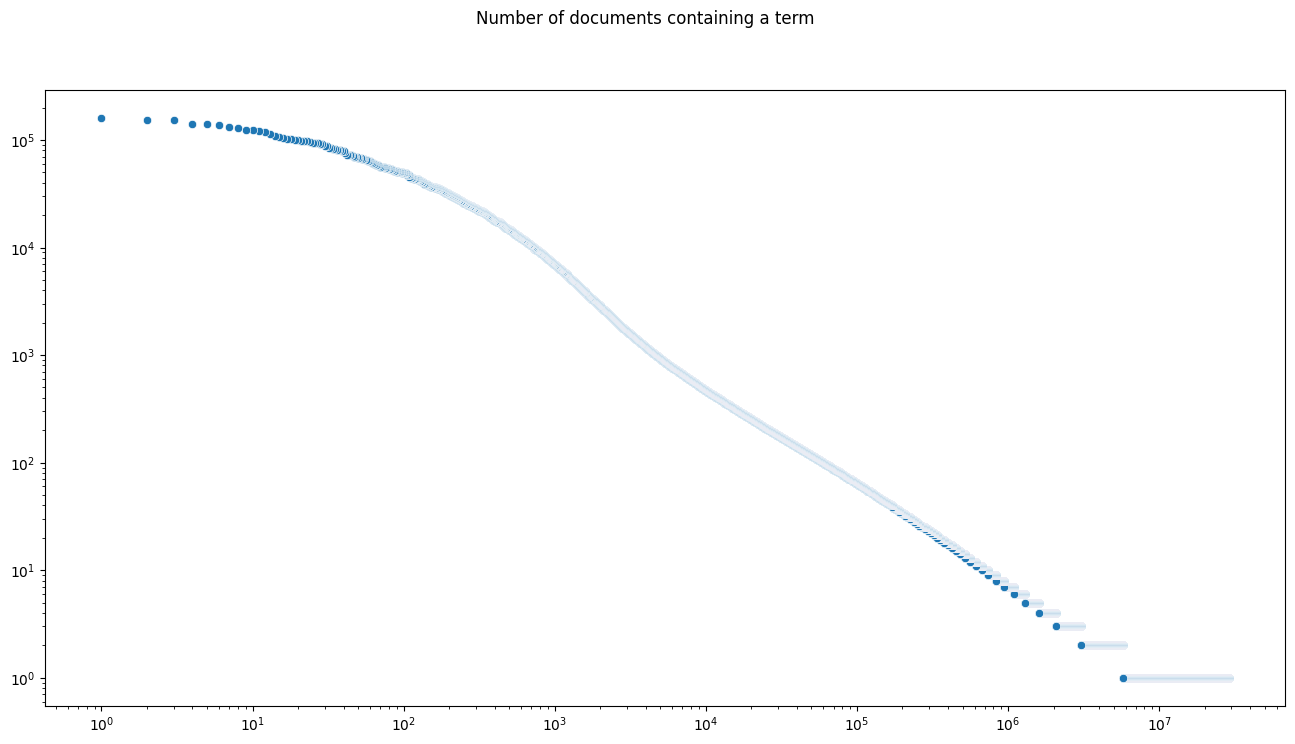

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(x=X, y=Y)
ax.set_xscale('log')
ax.set_yscale('log')
fig.suptitle('Number of documents containing a term')
plt.show()

We can see that, of the 5.6 million terms in the vocabulary, less than a million appear in at least 10 documents. We'll create a new vocabulary which only includes terms that occur in at least 10 documents, which allows us to reduce the vocabulary size substantially:

In [ ]:
new_vocabulary = [vocabulary[i] for i in range(vocab_size) if document_frequencies[i] > 10]
len(new_vocabulary)

669306

In [ ]:
print(new_vocabulary[1000:1100])

['2d optical lattice', '2d or', '2d or 3d', '2d order', '2d organic', '2d organic superconducting', '2d p', '2d pancake', '2d parabolic', '2d particle', '2d patterns', '2d peak', '2d percolation', '2d periodic', '2d perovskite', '2d perovskites', '2d phase', '2d phase transition', '2d phonon', '2d photon', '2d photon crystal', '2d physical', '2d planar', '2d plane', '2d plasmon', '2d platform', '2d point', '2d poisson', '2d polarization', '2d polymer', '2d potential', '2d potts', '2d potts model', '2d problem', '2d projection', '2d q', '2d q state', '2d quantum', '2d quantum antiferromagnetic', '2d quantum critical', '2d quantum dot', '2d quantum gravity', '2d quantum hall', '2d quantum heisenberg', '2d quantum ising', '2d quantum magnetic', '2d quantum materials', '2d quantum spin', '2d quantum system', '2d quantum turbulence', '2d quantum wells', '2d quasi', '2d quasi 1d', '2d quasi 2d', '2d raman', '2d random', '2d random bond', '2d random field', '2d rashba', '2d rectangular', '2d 

In [ ]:
vocabulary = new_vocabulary

### Time series analysis

Now that we have our new vectorizer vocabulary, we are going to calculate statistics for each feature by month and semester. I'll first calculate the document frequencies of each feature grouped by time period. For a number of years, the number of monthly publications was too low to perform a statistical analysis. Let's look at the number of monthly publications in January 2000:

In [ ]:
earliest_month = (2000 - 1992)*12 + 1-3
print(f"Found {len(cond_mat[cond_mat['months_since_March_1992']==earliest_month])} publications in January 2000.")

Found 506 publications in January 2000.


We will choose January 2000 as the start range for analysing historical trends in the cond-mat.

In [ ]:
latest_month = 385
monthly_publication_numbers = [len(cond_mat[cond_mat['months_since_March_1992'] == month]) for month in range(earliest_month,latest_month)]
earliest_semester = 100//6
latest_semester = 385//6
biannual_publication_numbers = [len(cond_mat[cond_mat['semesters_since_March_1992']== semester]) for semester in range(earliest_semester,latest_semester)]

In [ ]:
import gc

def get_document_frequencies(texts):
    vectorizer = CountVectorizer(preprocessor= lambda x:x, tokenizer=lambda x:x, ngram_range = (1,3), binary=True, token_pattern=None, vocabulary=vocabulary, lowercase=False)
    document_frequencies = (np.ravel(vectorizer.fit_transform(texts).sum(axis=0))+1)/len(texts) # add 1 to avoid divide by zero errors later
    del(vectorizer)
    gc.collect()
    return document_frequencies

In [ ]:
monthly_titles_df = np.array([get_document_frequencies(cond_mat[cond_mat['months_since_March_1992']==month]['title_base_replaced']) for month in tqdm(range(earliest_month, latest_month))])

100%|█████████████████████████████████████████| 291/291 [12:41<00:00,  2.62s/it]


In [ ]:
monthly_abstracts_df = np.array([get_document_frequencies(cond_mat[cond_mat['months_since_March_1992']==month]['abstract_base_replaced']) for month in tqdm(range(earliest_month, latest_month))])

100%|█████████████████████████████████████████| 291/291 [13:18<00:00,  2.74s/it]


In [ ]:
semesterly_titles_df = np.array([get_document_frequencies(cond_mat[cond_mat['semesters_since_March_1992']==semester]['title_base_replaced']) for semester in tqdm(range(earliest_semester, latest_semester))])

100%|███████████████████████████████████████████| 48/48 [02:10<00:00,  2.71s/it]


In [ ]:
semesterly_abstracts_df = np.array([get_document_frequencies(cond_mat[cond_mat['semesters_since_March_1992']==semester]['abstract_base_replaced']) for semester in tqdm(range(earliest_semester, latest_semester))])

100%|███████████████████████████████████████████| 48/48 [02:46<00:00,  3.47s/it]


Now that we have our time series data, we can look at the maximum and minimum values of the document frequencies in the abstract and title, counted monthly and semesterly, over the period since January 2000:

In [ ]:
df_data = pd.DataFrame()
df_data['term'] = vocabulary
df_data['max_monthly_abstract_df'] = monthly_abstracts_df.max(axis=0)
df_data['min_monthly_abstract_df'] = monthly_abstracts_df.min(axis=0)
df_data['max_monthly_title_df'] = monthly_titles_df.max(axis=0)
df_data['min_monthly_title_df'] = monthly_titles_df.min(axis=0)
df_data['min_semesterly_abstract_df'] = semesterly_abstracts_df.min(axis=0)
df_data['max_semesterly_abstract_df'] = semesterly_abstracts_df.max(axis=0)
df_data['min_semesterly_title_df'] = semesterly_titles_df.min(axis=0)
df_data['max_semesterly_title_df'] = semesterly_titles_df.max(axis=0)

Let's look at the terms that have occurred most frequently in the title for some six-month period:

In [ ]:
df_data.sort_values('max_semesterly_title_df', ascending=False).head(200)

,term,max_monthly_abstract_df,min_monthly_abstract_df,max_monthly_title_df,min_monthly_title_df,min_semesterly_abstract_df,max_semesterly_abstract_df,min_semesterly_title_df,max_semesterly_title_df
470000,quantum,0.304857,0.149096,0.152326,0.086093,0.183220,0.288148,0.106775,0.139431
363672,model,0.400000,0.272823,0.147708,0.062338,0.313569,0.380952,0.073472,0.128135
572860,superconducting,0.207018,0.083924,0.164251,0.045223,0.095539,0.164715,0.051981,0.119249
545060,spin,0.253118,0.144762,0.123958,0.041905,0.169072,0.231972,0.077593,0.109524
339603,magnetic,0.286458,0.188571,0.122318,0.069930,0.216762,0.267757,0.078556,0.108265
171649,effect,0.344311,0.210721,0.104167,0.054711,0.253823,0.330031,0.066835,0.088532
177772,electron,0.322727,0.176570,0.109783,0.047280,0.204587,0.294694,0.058228,0.084139
148096,dimensional,0.265378,0.162928,0.100935,0.040570,0.186013,0.244037,0.053769,0.079205
431641,phase,0.311976,0.195157,0.104497,0.049236,0.218930,0.288241,0.062540,0.074917
581391,system,0.429949,0.268934,0.095420,0.039423,0.296124,0.405975,0.048834,0.074613


We can also look at the distribution of maximum semesterly document frequencies for the terms in the vocabulary:

In [ ]:
df_data['max_semesterly_title_df'].describe()

count    669306.000000
mean          0.000387
std           0.000703
min           0.000306
25%           0.000306
50%           0.000306
75%           0.000372
max           0.139431
Name: max_semesterly_title_df, dtype: float64

We will now save some of our processed time-series data for machine learning in the next notebook. We will consider the top 500 terms by maximum semesterly document frequency in the title and abstract:

In [ ]:
title_keywords = df_data.sort_values('max_semesterly_title_df', ascending=False).head(500)
abstract_keywords = df_data.sort_values('max_semesterly_abstract_df', ascending=False).head(500)

For the title keywords, we will save the monthly values of the document frequencies in both the title and abstract:

In [ ]:
title_keywords_monthly_title_data = pd.DataFrame(monthly_titles_df[:, title_keywords.index], columns=title_keywords['term'])
title_keywords_monthly_title_data['months_since_Jan_2000'] = np.arange(latest_month-earliest_month)
title_keywords_monthly_title_data.set_index('months_since_Jan_2000', inplace=True)
title_keywords_monthly_title_data.head(10)

term,quantum,model,superconducting,spin,magnetic,effect,electron,dimensional,phase,system,...,torque,cold,compared,hydrodynamic,momentum,pair,kitaev,gauge,shape,vacancy
months_since_Jan_2000,,,,,,,,,,,,,,,,,,,,,
0,0.086957,0.112648,0.100791,0.088933,0.090909,0.081028,0.081028,0.084980,0.083004,0.077075,...,0.003953,0.001976,0.005929,0.007905,0.009881,0.007905,0.001976,0.003953,0.001976,0.001976
1,0.118774,0.124521,0.084291,0.095785,0.103448,0.084291,0.055556,0.067050,0.078544,0.072797,...,0.001916,0.001916,0.005747,0.001916,0.003831,0.007663,0.001916,0.003831,0.009579,0.001916
2,0.133568,0.117750,0.098418,0.086116,0.091388,0.075571,0.063269,0.086116,0.086116,0.084359,...,0.001757,0.001757,0.010545,0.008787,0.010545,0.007030,0.001757,0.005272,0.007030,0.001757
3,0.127542,0.138632,0.085028,0.075786,0.096118,0.073937,0.059150,0.077634,0.060998,0.060998,...,0.001848,0.005545,0.001848,0.001848,0.003697,0.012939,0.001848,0.005545,0.001848,0.001848
4,0.095076,0.147708,0.062818,0.093379,0.091681,0.057725,0.057725,0.086587,0.049236,0.064516,...,0.003396,0.001698,0.008489,0.006791,0.003396,0.005093,0.001698,0.001698,0.005093,0.001698
5,0.108656,0.134438,0.101289,0.084715,0.082873,0.073665,0.053407,0.066298,0.084715,0.079190,...,0.001842,0.005525,0.003683,0.005525,0.001842,0.005525,0.001842,0.009208,0.007366,0.003683
6,0.089789,0.133803,0.082746,0.089789,0.070423,0.066901,0.080986,0.065141,0.072183,0.084507,...,0.001761,0.001761,0.003521,0.001761,0.012324,0.001761,0.001761,0.010563,0.005282,0.001761
7,0.106667,0.142857,0.085714,0.041905,0.080000,0.078095,0.064762,0.064762,0.060952,0.085714,...,0.001905,0.001905,0.009524,0.007619,0.001905,0.007619,0.001905,0.007619,0.007619,0.001905
8,0.138318,0.123364,0.071028,0.078505,0.080374,0.089720,0.069159,0.100935,0.087850,0.065421,...,0.001869,0.007477,0.003738,0.009346,0.007477,0.011215,0.001869,0.005607,0.009346,0.007477


In [ ]:
title_keywords_monthly_title_data.to_csv('title_keywords_monthly_title_data.csv', sep=',', encoding='utf-8')

In [ ]:
title_keywords_monthly_abstract_data = pd.DataFrame(monthly_abstracts_df[:, title_keywords.index], columns=title_keywords['term'])
title_keywords_monthly_abstract_data['months_since_Jan_2000'] = np.arange(latest_month-earliest_month)
title_keywords_monthly_abstract_data.set_index('months_since_Jan_2000', inplace=True)
title_keywords_monthly_abstract_data.to_csv('title_keywords_monthly_abstract_data.csv', sep=',', encoding='utf-8')
title_keywords_monthly_abstract_data.head(10)

term,quantum,model,superconducting,spin,magnetic,effect,electron,dimensional,phase,system,...,torque,cold,compared,hydrodynamic,momentum,pair,kitaev,gauge,shape,vacancy
months_since_Jan_2000,,,,,,,,,,,,,,,,,,,,,
0,0.181818,0.377470,0.162055,0.189723,0.229249,0.290514,0.241107,0.239130,0.243083,0.288538,...,0.003953,0.007905,0.126482,0.011858,0.053360,0.045455,0.001976,0.007905,0.031621,0.005929
1,0.208812,0.373563,0.143678,0.185824,0.210728,0.247126,0.180077,0.226054,0.218391,0.285441,...,0.001916,0.005747,0.109195,0.011494,0.065134,0.034483,0.001916,0.017241,0.040230,0.003831
2,0.179262,0.393673,0.147627,0.198594,0.221441,0.254833,0.209139,0.265378,0.212654,0.311072,...,0.007030,0.005272,0.166960,0.010545,0.063269,0.029877,0.001757,0.015817,0.038664,0.005272
3,0.186691,0.375231,0.131238,0.205176,0.221811,0.210721,0.203327,0.242144,0.232902,0.290203,...,0.003697,0.005545,0.123845,0.009242,0.057301,0.042514,0.001848,0.016636,0.036969,0.001848
4,0.183362,0.348048,0.113752,0.191851,0.239389,0.247878,0.176570,0.252971,0.217317,0.297114,...,0.003396,0.001698,0.125637,0.015280,0.056027,0.032258,0.001698,0.020374,0.028862,0.003396
5,0.204420,0.397790,0.128913,0.197053,0.233886,0.239411,0.191529,0.224678,0.246777,0.292818,...,0.001842,0.005525,0.117864,0.016575,0.038674,0.031308,0.001842,0.025783,0.031308,0.009208
6,0.170775,0.390845,0.121479,0.204225,0.218310,0.265845,0.218310,0.227113,0.250000,0.341549,...,0.001761,0.007042,0.107394,0.014085,0.066901,0.024648,0.001761,0.026408,0.028169,0.005282
7,0.190476,0.392381,0.127619,0.144762,0.188571,0.251429,0.180952,0.245714,0.219048,0.356190,...,0.003810,0.003810,0.120000,0.017143,0.047619,0.034286,0.001905,0.015238,0.045714,0.005714
8,0.207477,0.370093,0.121495,0.164486,0.203738,0.257944,0.192523,0.222430,0.229907,0.340187,...,0.003738,0.011215,0.112150,0.014953,0.035514,0.031776,0.001869,0.007477,0.033645,0.009346


We will also save the document frequencies for the abstract keywords, but we will only consider the frequencies of these keywords in the abstracts:

In [ ]:
abstract_keywords_monthly_abstract_data = pd.DataFrame(monthly_abstracts_df[:, abstract_keywords.index], columns=abstract_keywords['term'])
abstract_keywords_monthly_abstract_data['months_since_Jan_2000'] = np.arange(latest_month-earliest_month)
abstract_keywords_monthly_abstract_data.set_index('months_since_Jan_2000', inplace=True)
abstract_keywords_monthly_abstract_data.to_csv('abstract_keywords_monthly_abstract_data.csv', sep=',', encoding='utf-8')
abstract_keywords_monthly_abstract_data.head(10)

term,system,state,study,results,model,two,effect,these,show,between,...,resolved,f,suppressed,patterns,could,following,standard,electrolyte,typical,mode
months_since_Jan_2000,,,,,,,,,,,,,,,,,,,,,
0,0.288538,0.294466,0.326087,0.343874,0.377470,0.308300,0.290514,0.185771,0.191700,0.199605,...,0.007905,0.027668,0.029644,0.011858,0.023715,0.029644,0.035573,0.017787,0.019763,0.039526
1,0.285441,0.321839,0.354406,0.350575,0.373563,0.291188,0.247126,0.191571,0.197318,0.262452,...,0.013410,0.030651,0.030651,0.034483,0.022989,0.026820,0.032567,0.007663,0.030651,0.059387
2,0.311072,0.342707,0.312830,0.326889,0.393673,0.333919,0.254833,0.233743,0.170475,0.246046,...,0.019332,0.036907,0.029877,0.026362,0.015817,0.035149,0.029877,0.017575,0.026362,0.028120
3,0.290203,0.312384,0.323475,0.297597,0.375231,0.308688,0.210721,0.199630,0.199630,0.243993,...,0.014787,0.029575,0.022181,0.022181,0.025878,0.029575,0.055453,0.009242,0.018484,0.029575
4,0.297114,0.288625,0.319185,0.293718,0.348048,0.317487,0.247878,0.161290,0.222411,0.222411,...,0.025467,0.039049,0.035654,0.020374,0.020374,0.054329,0.035654,0.010187,0.027165,0.042445
5,0.292818,0.333333,0.322284,0.302026,0.397790,0.307551,0.239411,0.211786,0.232044,0.263352,...,0.014733,0.046041,0.036832,0.022099,0.018416,0.040516,0.036832,0.022099,0.016575,0.031308
6,0.341549,0.309859,0.341549,0.334507,0.390845,0.311620,0.265845,0.216549,0.237676,0.242958,...,0.014085,0.033451,0.021127,0.031690,0.019366,0.038732,0.031690,0.017606,0.021127,0.036972
7,0.356190,0.314286,0.329524,0.339048,0.392381,0.337143,0.251429,0.194286,0.228571,0.240000,...,0.022857,0.026667,0.038095,0.034286,0.024762,0.045714,0.034286,0.017143,0.026667,0.032381
8,0.340187,0.302804,0.284112,0.310280,0.370093,0.314019,0.257944,0.196262,0.207477,0.239252,...,0.016822,0.037383,0.022430,0.024299,0.016822,0.039252,0.026168,0.014953,0.028037,0.033645


As we can see, terms like 'study', 'results', etc. commonly appear in the abstracts, but their document frequency in the title is not as meaningful.

We have seen that there is a small number of words that have occurred in 10% of all published titles within one of the six-month periods (*quantum*, *model*, *superconducting*, *spin*, *magnetic*). From now on, we will be interested in keywords that have exhibited the most growth. Let's look at the ratio between maximum and minimum document frequencies in the title and abstract for the title keywords:

In [ ]:
title_keywords.loc[:,'max/min_semesterly_abstract_df'] = title_keywords.apply(lambda row: row['max_semesterly_abstract_df']/row['min_semesterly_abstract_df'], axis=1)
title_keywords.loc[:,'max/min_semesterly_title_df'] = title_keywords.apply(lambda row: row['max_semesterly_title_df']/row['min_semesterly_title_df'], axis=1)

title_keywords.sort_values('max/min_semesterly_abstract_df', ascending=False).head(200)

,term,max_monthly_abstract_df,min_monthly_abstract_df,max_monthly_title_df,min_monthly_title_df,min_semesterly_abstract_df,max_semesterly_abstract_df,min_semesterly_title_df,max_semesterly_title_df,max/min_semesterly_abstract_df,max/min_semesterly_title_df
338994,machine learning,0.041916,0.000672,0.018878,0.000672,0.000140,0.036852,0.000140,0.015741,263.748704,112.656481
613674,topological insulator,0.040268,0.000986,0.026116,0.000914,0.000191,0.034364,0.000191,0.017812,180.378007,93.497163
359326,mgb2,0.053140,0.000505,0.053140,0.000505,0.000187,0.030493,0.000094,0.030221,162.785734,322.664579
254798,graphene,0.096935,0.001109,0.085336,0.001078,0.000696,0.082962,0.000230,0.073019,119.161522,317.996438
344400,majorana,0.030201,0.000914,0.014824,0.000914,0.000211,0.023190,0.000198,0.009861,109.666883,49.769939
442211,pnictides,0.027563,0.000526,0.022051,0.000505,0.000186,0.019800,0.000187,0.014896,106.524977,79.750772
614151,topological phase,0.037675,0.000955,0.013383,0.000842,0.000272,0.026414,0.000199,0.008955,97.018449,44.925006
657487,weyl semimetal,0.024496,0.000773,0.016571,0.000773,0.000147,0.013867,0.000147,0.009541,94.103617,64.743288
369572,moir,0.021778,0.000674,0.010821,0.000637,0.000167,0.015211,0.000140,0.007685,90.837987,55.025926
369573,moir e,0.021778,0.000674,0.010821,0.000637,0.000167,0.015111,0.000140,0.007605,90.240368,54.454118


*Machine learning* is at the top of the list. We can look at the distribution of the ratios:

In [ ]:
title_keywords['max/min_semesterly_abstract_df'].describe()

count    500.000000
mean       7.323755
std       21.959022
min        1.126150
25%        1.543187
50%        2.088154
75%        3.227569
max      263.748704
Name: max/min_semesterly_abstract_df, dtype: float64

In [ ]:
title_keywords['max/min_semesterly_title_df'].describe()

count    500.000000
mean       9.415027
std       26.374908
min        1.184545
25%        2.138992
50%        2.916922
75%        5.218749
max      322.664579
Name: max/min_semesterly_title_df, dtype: float64

We are now ready to plot the time series data for some of these keywords:

In [ ]:
fastest_growing_keywords = title_keywords.sort_values('max/min_semesterly_abstract_df', ascending=False).index.tolist()

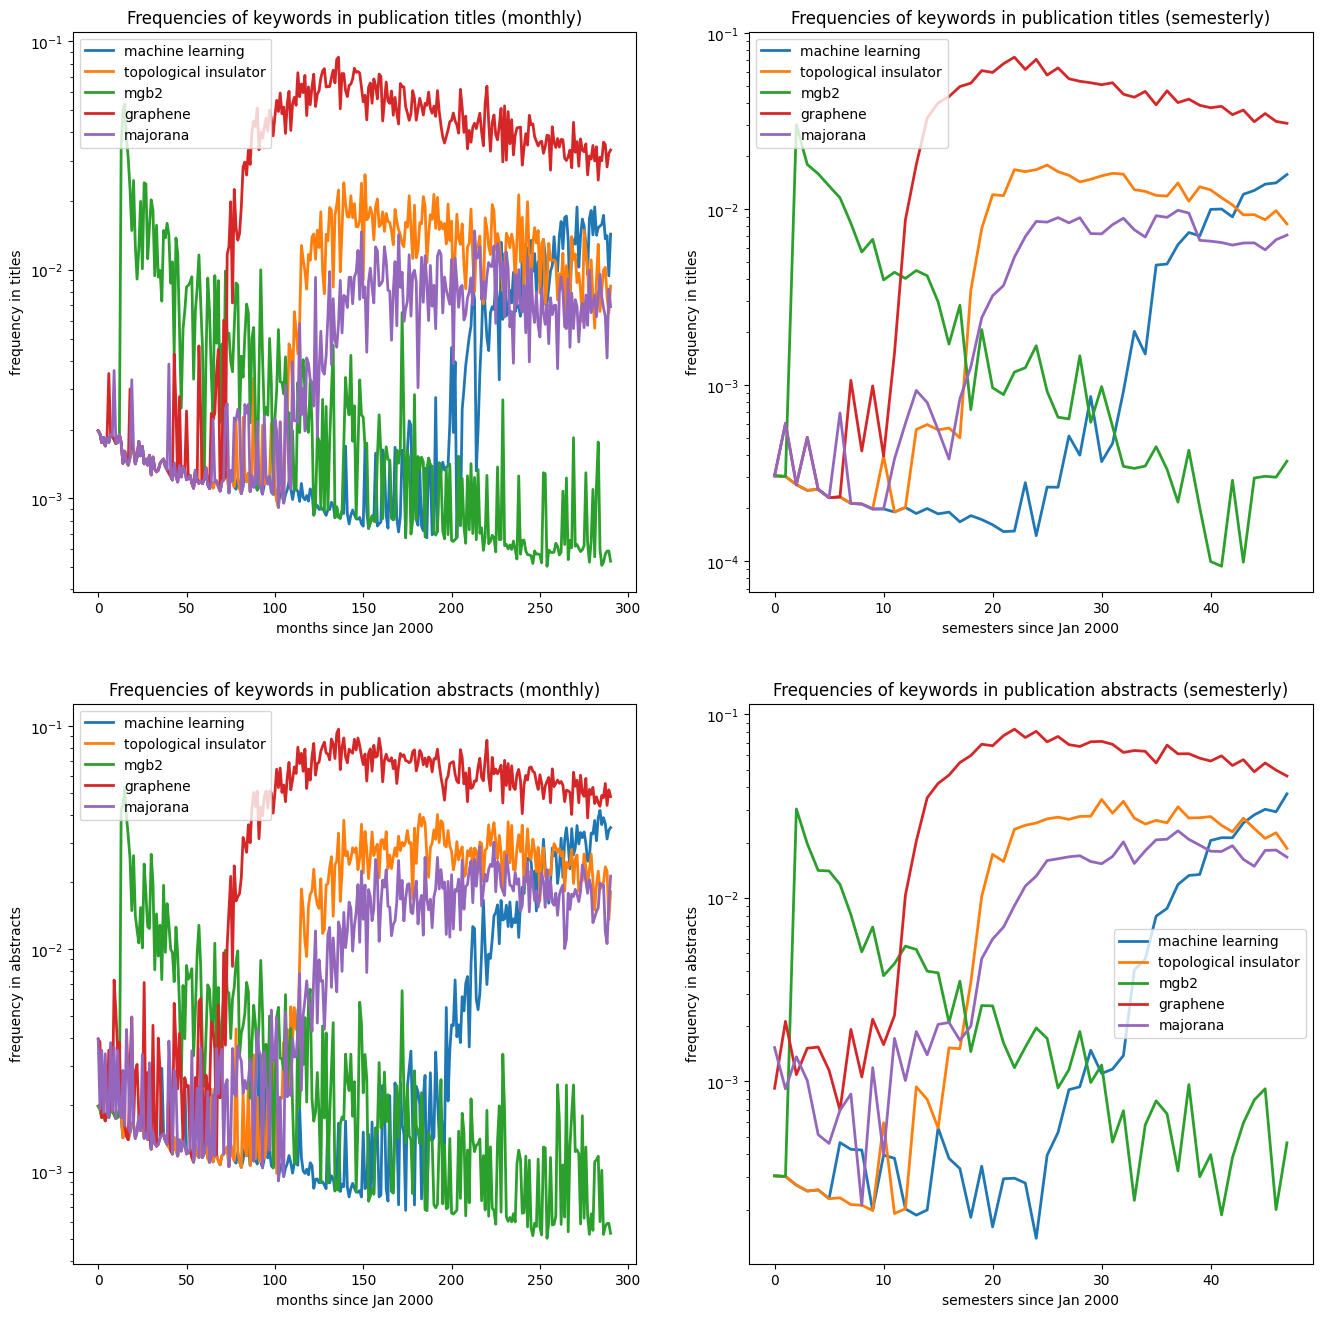

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(16, 16))
ax[0,0].set_title('Frequencies of keywords in publication titles (monthly)')
ax[0,0].set_xlabel('months since Jan 2000')
ax[0,0].set_ylabel('frequency in titles')
ax[0,0].set_yscale('log')

ax[0,1].set_title('Frequencies of keywords in publication titles (semesterly)')
ax[0,1].set_xlabel('semesters since Jan 2000')
ax[0,1].set_ylabel('frequency in titles')
ax[0,1].set_yscale('log')

ax[1,0].set_title('Frequencies of keywords in publication abstracts (monthly)')
ax[1,0].set_xlabel('months since Jan 2000')
ax[1,0].set_ylabel('frequency in abstracts')
ax[1,0].set_yscale('log')

ax[1,1].set_title('Frequencies of keywords in publication abstracts (semesterly)')
ax[1,1].set_xlabel('semesters since Jan 2000')
ax[1,1].set_ylabel('frequency in abstracts')
ax[1,1].set_yscale('log')


for idx in fastest_growing_keywords[:5]:
    sns.lineplot(x=np.arange(monthly_titles_df.shape[0]), y=monthly_titles_df[:,idx], ax=ax[0,0], linewidth=2, label=title_keywords.at[idx,'term'])
    sns.lineplot(x=np.arange(semesterly_titles_df.shape[0]), y=semesterly_titles_df[:,idx], ax=ax[0,1], linewidth=2, label=title_keywords.at[idx,'term'])
    sns.lineplot(x=np.arange(monthly_abstracts_df.shape[0]), y=monthly_abstracts_df[:,idx], ax=ax[1,0], linewidth=2, label=title_keywords.at[idx,'term'])
    sns.lineplot(x=np.arange(semesterly_abstracts_df.shape[0]), y=semesterly_abstracts_df[:,idx], ax=ax[1,1], linewidth=2, label=title_keywords.at[idx,'term'])

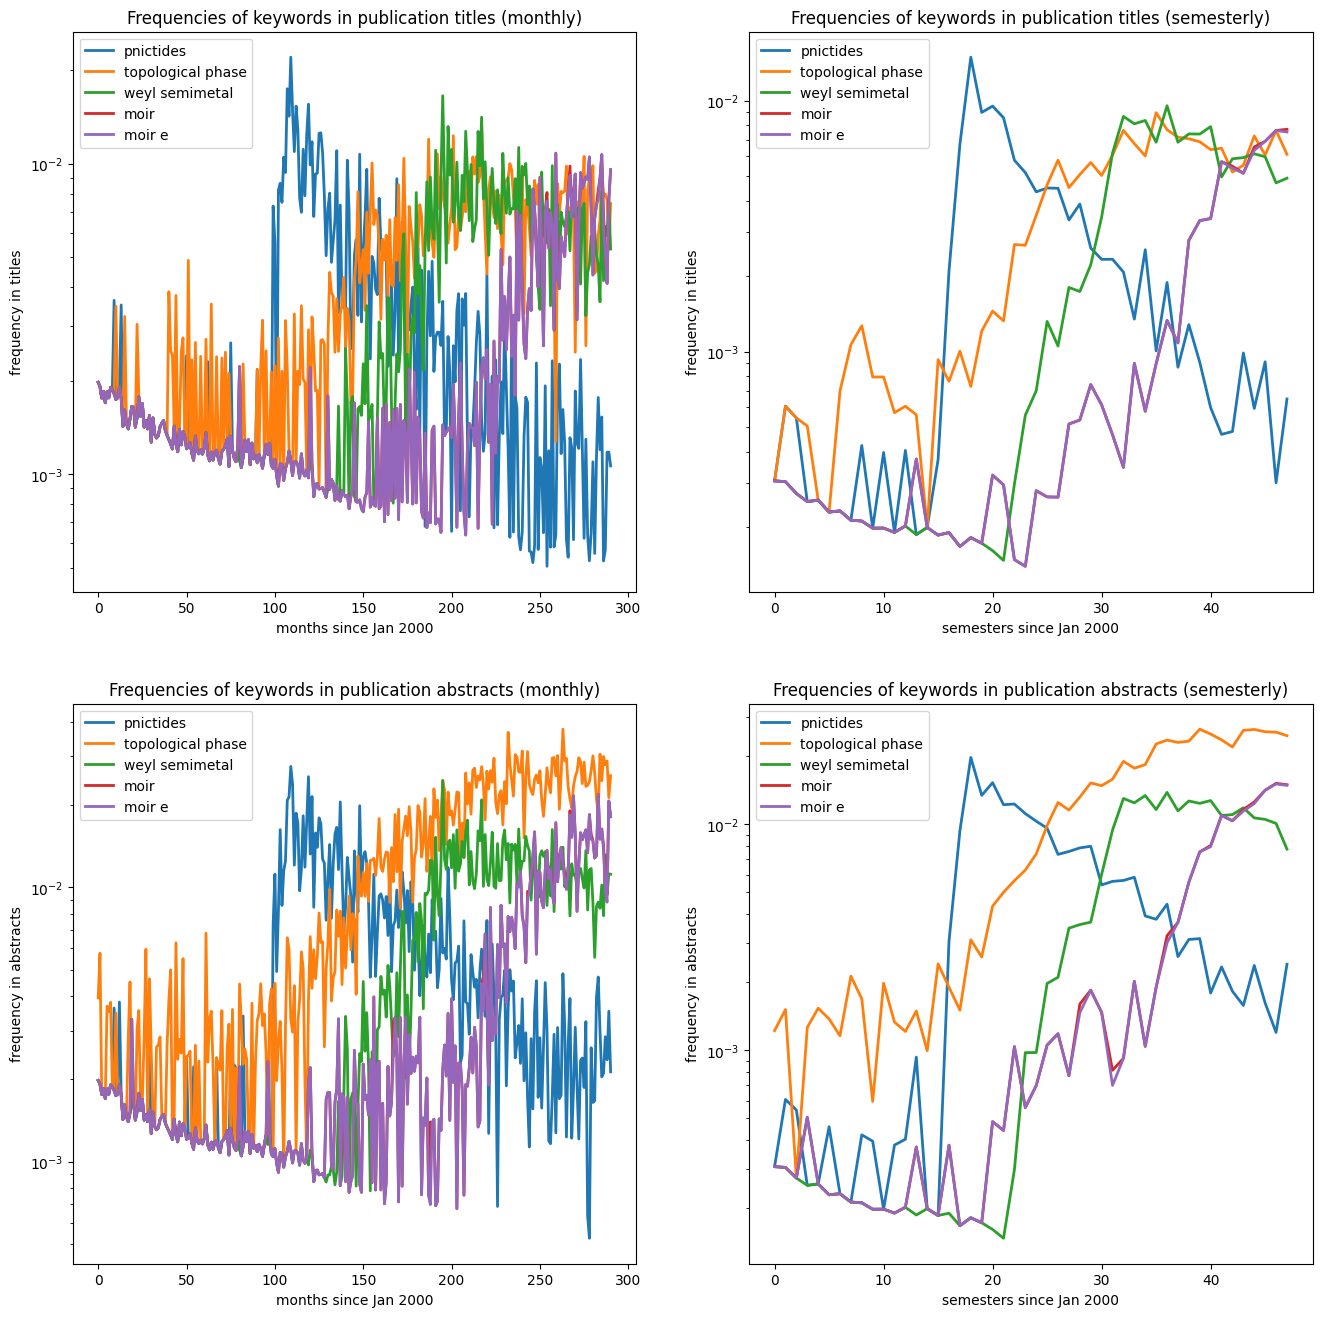

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(16, 16))
ax[0,0].set_title('Frequencies of keywords in publication titles (monthly)')
ax[0,0].set_xlabel('months since Jan 2000')
ax[0,0].set_ylabel('frequency in titles')
ax[0,0].set_yscale('log')

ax[0,1].set_title('Frequencies of keywords in publication titles (semesterly)')
ax[0,1].set_xlabel('semesters since Jan 2000')
ax[0,1].set_ylabel('frequency in titles')
ax[0,1].set_yscale('log')

ax[1,0].set_title('Frequencies of keywords in publication abstracts (monthly)')
ax[1,0].set_xlabel('months since Jan 2000')
ax[1,0].set_ylabel('frequency in abstracts')
ax[1,0].set_yscale('log')

ax[1,1].set_title('Frequencies of keywords in publication abstracts (semesterly)')
ax[1,1].set_xlabel('semesters since Jan 2000')
ax[1,1].set_ylabel('frequency in abstracts')
ax[1,1].set_yscale('log')


for idx in fastest_growing_keywords[5:10]:
    sns.lineplot(x=np.arange(monthly_titles_df.shape[0]), y=monthly_titles_df[:,idx], ax=ax[0,0], linewidth=2, label=title_keywords.at[idx,'term'])
    sns.lineplot(x=np.arange(semesterly_titles_df.shape[0]), y=semesterly_titles_df[:,idx], ax=ax[0,1], linewidth=2, label=title_keywords.at[idx,'term'])
    sns.lineplot(x=np.arange(monthly_abstracts_df.shape[0]), y=monthly_abstracts_df[:,idx], ax=ax[1,0], linewidth=2, label=title_keywords.at[idx,'term'])
    sns.lineplot(x=np.arange(semesterly_abstracts_df.shape[0]), y=semesterly_abstracts_df[:,idx], ax=ax[1,1], linewidth=2, label=title_keywords.at[idx,'term'])